# Part I - (Rides in bike-sharing system)
## by (Adisa Ramon)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area collected through January 2018 to December 2018

## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### Load in the dataset and describe its properties

In [3]:
#load dataset into pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
#view data head
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#view number of rows and columns
df.shape

(183412, 16)

In [6]:
#descriptive statistical summary of the dataset numerical values
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#data types and count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Data Cleaning

In [8]:
# Change the start_time and end_time to datetime format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [9]:
# Extract weekday from start time 
df['start_time_weekday'] = df['start_time'].dt.strftime('%a')

In [10]:
# Extract hour from start time and end time 
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

### What is the structure of your dataset?

> There are 183412 bikes described in the dataset with 16 features describing each bike. Most of the variables are numerical variables although their values does not show magnitude.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the duration spent biking

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Duration of biking, user type, member age (in 2018),distance travelled and member gender

## Univariate Exploration


##### Question: what is the gender distribution of the bikers?

##### Visualization

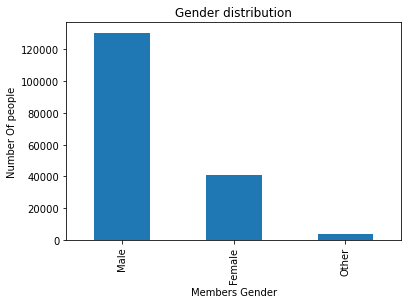

In [11]:
df.member_gender.value_counts().plot.bar();
plt.title('Gender distribution')
plt.xlabel('Members Gender')
plt.ylabel('Number Of people');

##### Observations: It is observed from the above plot that most of the users are males and they are more than twice the population of the females.

##### Question: what is the age distribution of users in the dataset?

##### Visualization: I created a new column in the dataframe called member_age to hold the values of the riders age as at 2018

In [12]:
#create a new column for ages of the users using their birth year up till 2018
df['member_age']=2018-df.member_birth_year

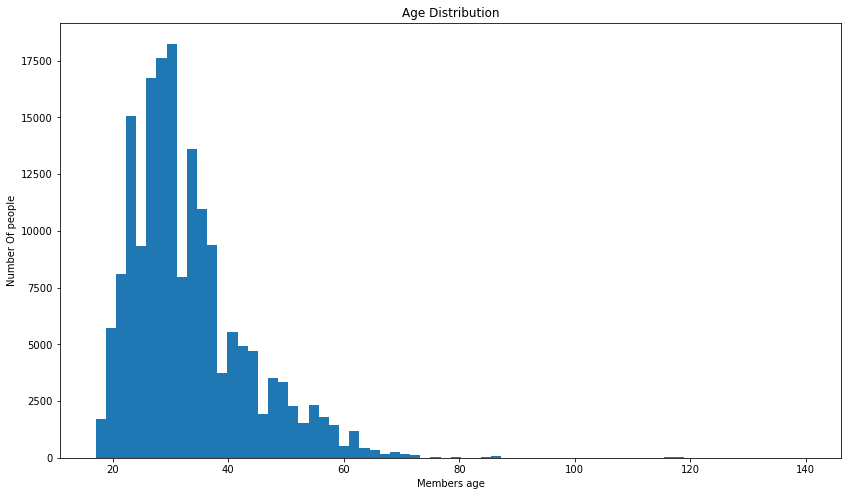

In [13]:
#create the plot
df.member_age.plot.hist(bins=70)
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.title('Age Distribution')
plt.xlabel('Members age')
plt.ylabel('Number Of people')
plt.show()

##### Observation: most of the users are between ages 20 to 40 years

##### Question: what is the range of time spent biking?

##### Visualization:

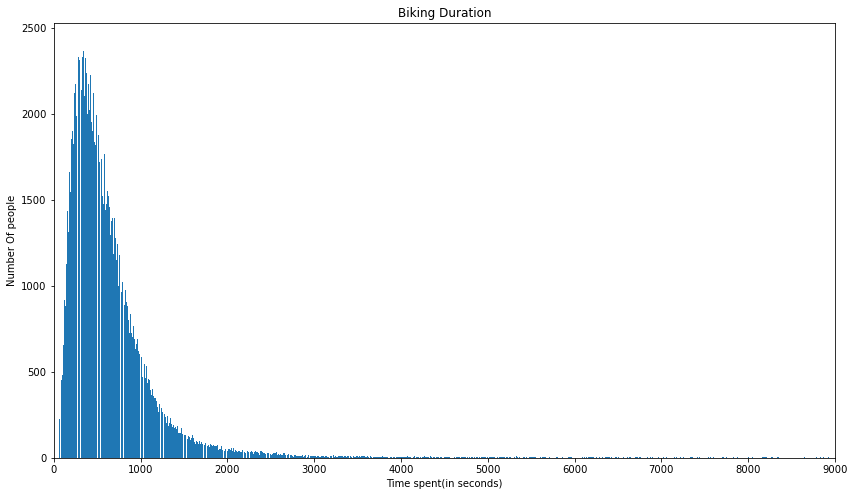

In [14]:
df.duration_sec.plot.hist(bins=10000,rwidth=0.9);
plt.xlim(0,9000)
fig = plt.gcf()
fig.set_size_inches(14,8)
plt.title('Biking Duration')
plt.xlabel('Time spent(in seconds)')
plt.ylabel('Number Of people');
plt.show()

##### Observation: most users spent less than 1000s biking.

##### Question: what is the distribution of the bike user types?

##### Visualization: 

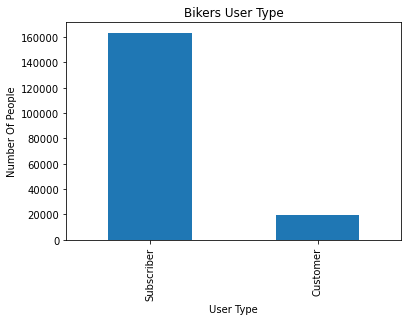

In [37]:
df.user_type.value_counts().plot.bar()
plt.title('Bikers User Type')
plt.xlabel('User Type')
plt.ylabel('Number Of People');

##### Observations: it is observed that a very large population of the riders are subscribers

##### Question:  What is the daily bike usage?

##### Visualization:

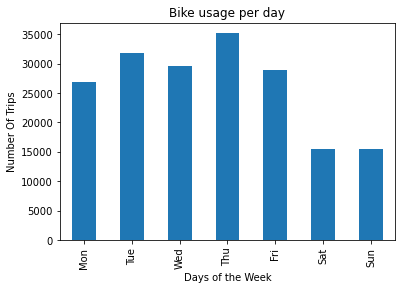

In [39]:
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df.start_time_weekday.value_counts().reindex(day_order).plot.bar() 
fig = plt.gcf()
plt.title('Bike usage per day')
plt.xlabel('Days of the Week')
plt.ylabel('Number Of Trips');
plt.show()

##### Observation: Thursday is the day with the highest bike usage

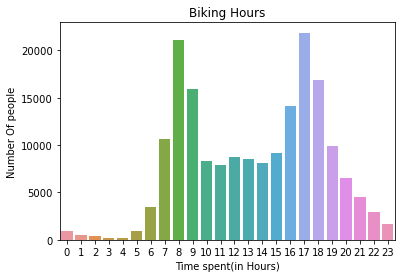

In [17]:
sns.countplot(data=df,x=df.start_time_hour)
plt.title('Biking Hours')
plt.xlabel('Time spent(in Hours)')
plt.ylabel('Number Of people');
plt.show()

##### Observation: it is observed that the peak hours are 8 and 17 hours

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

##### Question: what is total the duration of biking based on gender?

##### Visualization: I created a new dataframe off the given dataframe to calculate the amount of time spent biking based on gender

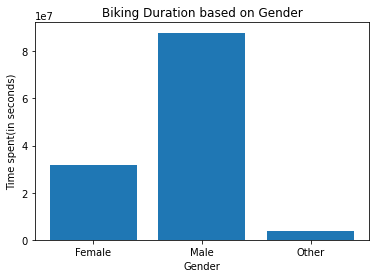

In [20]:
gen = df.groupby('member_gender')['duration_sec'].sum() 
df_gender = gen.to_frame().reset_index()
plt.bar(df_gender.member_gender,df_gender.duration_sec);
plt.title('Biking Duration based on Gender')
plt.ylabel('Time spent(in seconds)')
plt.xlabel('Gender')
plt.show()

##### Observation: more males are biking for longer duration than females and Other

##### Question: what is the mean duration of biking based on user type

##### Visualization: I created a new dataframe off the given dataframe to calculate the amount of time spent biking based on user type

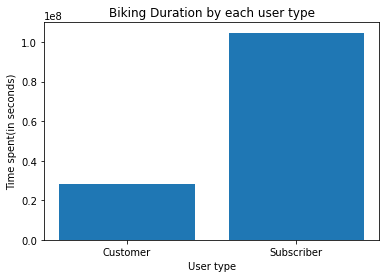

In [21]:
users = df.groupby('user_type')['duration_sec'].sum() 
df_users = users.to_frame().reset_index()
plt.bar(df_users.user_type,df_users.duration_sec)
plt.title('Biking Duration by each user type')
plt.ylabel('Time spent(in seconds)')
plt.xlabel('User type');
plt.show()

##### Observation: The total biking time by subscriber is more than that of the Customer

##### Question: what is the average age based on member gender

###### Visualization: I created a new dataframe off the given dataframe to calculate the members age based on gender 

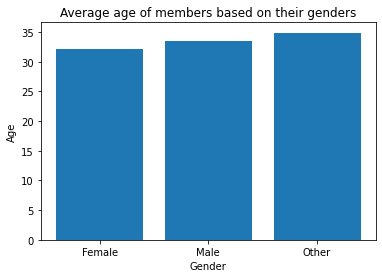

In [22]:
gender_age=df.groupby('member_gender')['member_age'].mean()
df_gender_age = gender_age.to_frame().reset_index()
plt.bar(df_gender_age.member_gender,df_gender_age.member_age);
plt.title('Average age of members based on their genders')
plt.ylabel('Age')
plt.xlabel('Gender')
plt.show()

##### Observation: the average age of each gender class is relatively close with others being the highest and females being the lowest

##### Question: what is the average age based on user type

###### Visualization: I created a new dataframe off the given dataframe to calculate the members age based on user type 

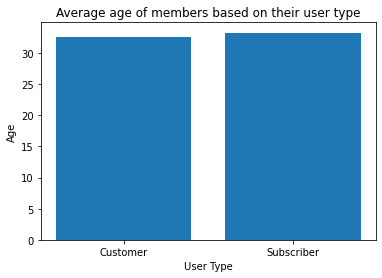

In [23]:
user_age=df.groupby('user_type')['member_age'].mean()
df_user_age = user_age.to_frame().reset_index()
plt.bar(df_user_age.user_type,df_user_age.member_age);
plt.title('Average age of members based on their user type')
plt.ylabel('Age')
plt.xlabel('User Type')
plt.show()

##### Observations: the average age of the Customers and Subscriber are almost exactly same

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

##### Question: what is the daily bike usage for each user type?

##### Visualization:

In [34]:
def myPlot(df,xVar,yVar):
    days_in_week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    n = sns.catplot(data=df,x=xVar,kind='count',col=yVar,order=days_in_week,sharey=False)

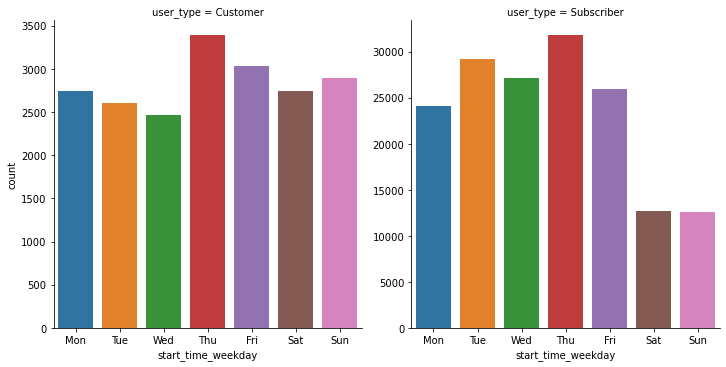

In [35]:
myPlot(df,'start_time_weekday','user_type')

##### Observation: For both user types, thursdays are the busiest while other days varies

##### Question: what is the daily bike usage for each Member Gender?

##### Visualization:

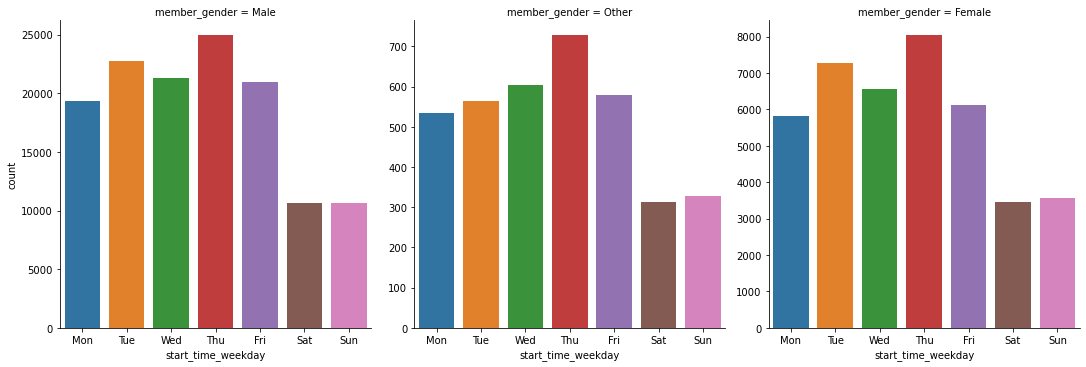

In [36]:
myPlot(df,'start_time_weekday','member_gender')

##### Observation: Thursday is the busiest day for all the gender while other days varies across the genders

###### Question: what is the number of bikers based on each gender of the users?

###### Visualization:

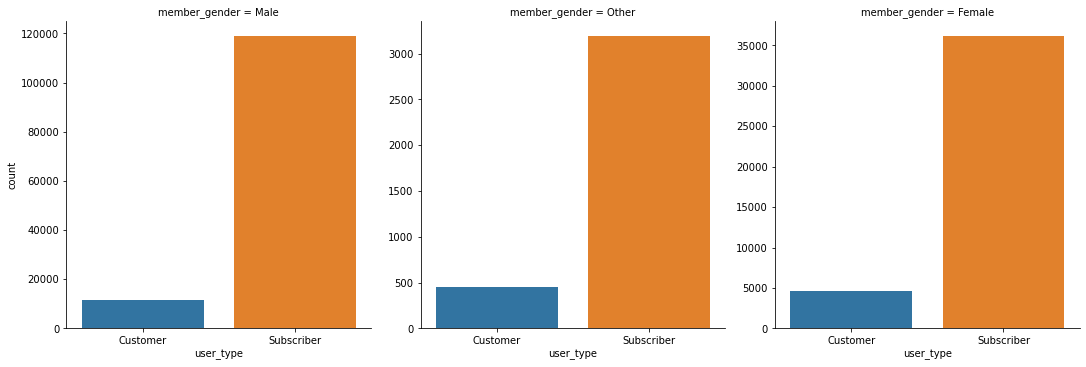

In [26]:
g = sns.catplot(data=df,x='user_type',kind='count',col='member_gender',sharey=False) 

##### Observation: Subscribers are much more than Customers across board

##### Question: which user type gender rode for the most duartion?

#### Visualization:

In [32]:
#define a function that takes three variables and create a visualization from there

def myGrpPlot(df,grpvar,yvar,stat='sum'):
    df.groupby(grpvar)[yvar].agg(stat).unstack().plot.bar(edgecolor='black',figsize=[14,6],rot=0,width=0.8)
    grpvar = ' & '.join([x.replace('_',' ') for x in grpvar])
    yvar = yvar.replace('_',' ')
    plt.title(f'{stat} of {yvar} by {grpvar}'.title(),fontsize=14, weight = 'bold')
    plt.xlabel(grpvar.title(),fontsize = 10, weight = 'bold')
    plt.ylabel(f'{stat}{yvar}'.title(),fontsize = 10, weight = 'bold')

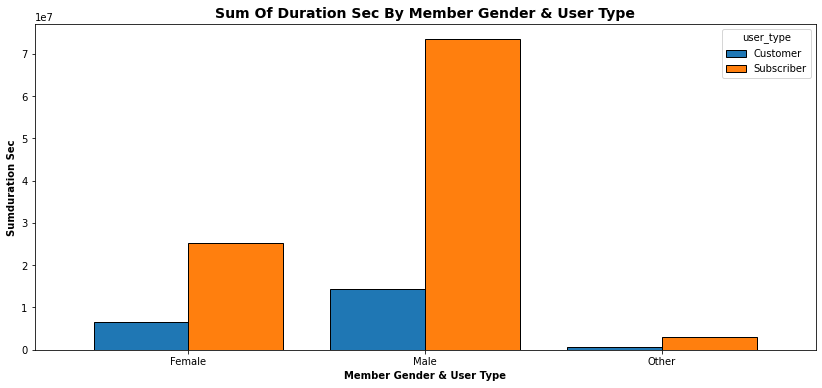

In [33]:
myGrpPlot(df,['member_gender','user_type'],'duration_sec')

##### Observation: male subscribers rode for the most time duration

###### Question: what is the age distribution of users based on gender?

##### Visualization:

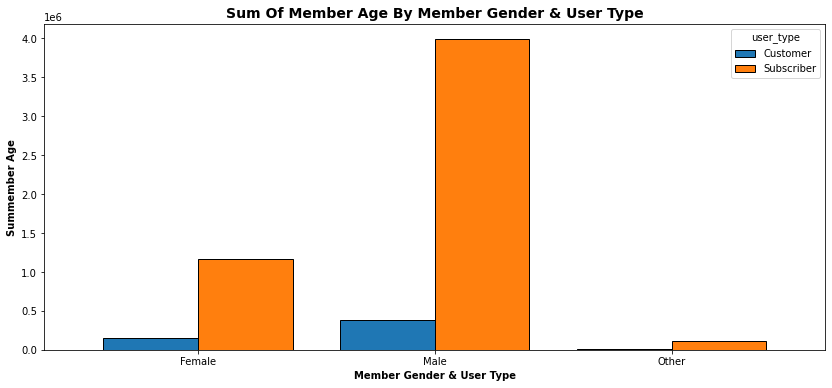

In [31]:
myGrpPlot(df,['member_gender','user_type'],'member_age')

##### Observation: The male subscribers are the oldest class category

##### Question: which user type has the mean oldest age

##### Visualization: 

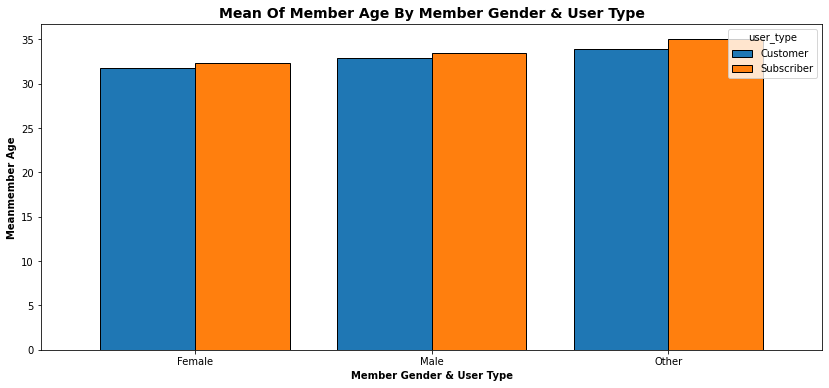

In [40]:
myGrpPlot(df,['member_gender','user_type'],'member_age',stat='mean')

##### Observation: The Other subscribers are the mean oldest class category

## Conclusions
>It observed that Thursdays are the busiest days and the male had the most of the features ranging from age, biking duration, biking distance, population etc.
